In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from typing import Tuple
import os
import re
import pathlib
from pathlib import Path
import pandas as pd
import numpy as np

# import fnmatch
import os
import shutil

In [2]:
def clear_directory(directory):
    # DELETE .ipynb_checkpoints .. 
    folder_to_delete = list(pathlib.Path(directory).rglob('.ipynb_checkpoints'))
    for file in folder_to_delete:
        try:
            shutil.rmtree(file) 
            print(f'folder removed {file}')
            print('folder is clear')
        except FileNotFoundError:
            print('no ipynb_checkpoints shit s here )')
        

In [3]:
        
def return_dataframes(folder, classes):
    list_files = list(pathlib.Path(folder).\
                                  rglob('*.jpg'))

    df = pd.DataFrame({
             'filename':[str(x) for x in list_files],
            'class':[x.parent.name for x in list_files]},
                 )
    df = df.astype({
            'filename':str,
            'class' :str}
    )
    
    selected_df = df[df['class'].isin(list(classes))].\
                        sort_values('class').\
                            reset_index(drop=True)
    return selected_df

In [8]:
def load_classes_from_csv(csv):
    if isinstance(csv, pd.DataFrame):
        vms = csv.iloc[:,csv.columns.str.contains('vms')].iloc[:,0]
        return sorted(vms.astype(str), key=float)
    else:
        csv = pd.read_csv(csv)
        vms = csv.iloc[:,csv.columns.str.contains('vms')].iloc[:,0]
        print(f'loading classes form csv {csv}')
        return sorted(vms.astype(str), key=float)
    

In [159]:
DATA_DIR = '/workspace/detect-me/product_classifier/data/'

In [160]:
def return_dataframe(dirr, subset):
    list_images = list(Path(dirr).rglob('*.jpg'))
    df = pd.DataFrame(
    {'filepath' : list_images,
    'partial_filepath' : [pathlib.Path(str(x).split('/data/')[1]) for x in list_images]})
    df_parts = pd.DataFrame(
        df.partial_filepath.apply(lambda x : x.parts).to_list())
    df_j = pd.concat([df, df_parts],
                     axis=1)

    df_j = df_j.rename({0:'seccat', 
                1 :'subset',
                2:'vms',
                3:'filename'},axis=1)

    df_j = df_j[df_j['subset'] == subset]
    df_j = df_j[~df_j.filepath.astype(str).str.contains('ipynb_checkpoints')]
    
    if df_j.empty:
        raise Exception('NO NO returned dataframe is empty, maybe folder struct is not right..\nData/ Second category / vms ')
    
    df_selected = df_j[['filepath','seccat']]

    df_selected = df_selected.assign(seccat = np.where(df_selected.seccat == 'milk', 'shyr', df_selected.seccat))

    df_selected = df_selected.assign(seccat = np.where(df_selected.seccat == 'yogurt', 'mast', df_selected.seccat))

    df_selected.columns = ['filename', 'class']

    df_selected = df_selected.astype({'filename' :str})
    return df_selected

In [161]:
# df_selected = df_j[df_j.loc[:,5].isin(['milk', 'yogurt'])].copy()[['filenames', 5 ]]

In [162]:
df_selected = return_dataframe(DATA_DIR, 'train-val')

In [163]:
df_selected['class'].value_counts()

mast                          29995
shyr                          13221
mhthvlat_arayshy               5962
lvazm_althryr_v_adary          3565
lvazm_ashpzkhanh               3329
                              ...  
akssvry_frdy_v_pvshak            34
zdaafvny_knndh_stvh_v_myvh       22
sayr_afzvdny_ha                   8
anvaaa_khmyr                      5
dkhanyat                          5
Name: class, Length: 110, dtype: int64

In [127]:
df_selected = df_seleunique[['filepath','seccat']]

df_selected = df_selected.assign(seccat = np.where(df_selected.seccat == 'milk', 'shyr', df_selected.seccat))

df_selected = df_selected.assign(seccat = np.where(df_selected.seccat == 'yogurt', 'mast', df_selected.seccat))

df_selected.columns = ['filename', 'class']

df_selected = df_selected.astype({'filename' :str})

In [172]:
import matplotlib.pyplot as plt 

29995

In [212]:
count_df = count_df.sort_values('filename', ascending=False)

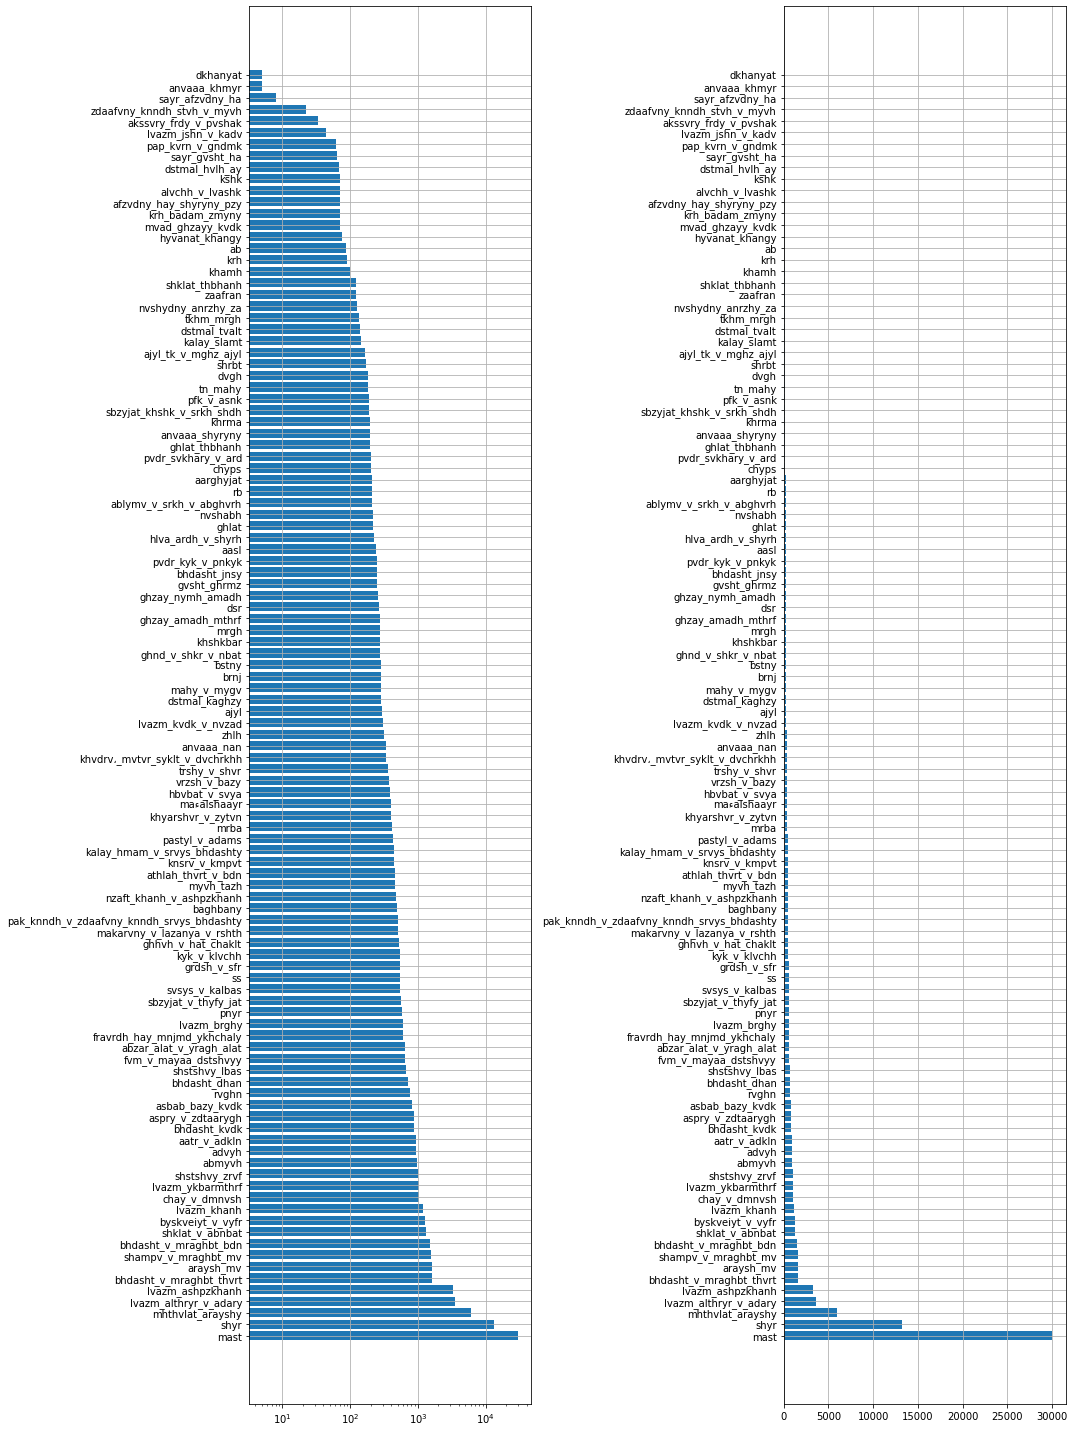

In [213]:
plt.figure(figsize=(15,20))
plt.subplot(1,2,1)
plt.barh(count_df.index,count_df['filename'],log=True)

plt.grid(True)


plt.subplot(1,2,2)
plt.barh(count_df.index,count_df['filename'])

plt.grid(True)
plt.tight_layout()
plt.show()
# count_df = df_selected.groupby('class').count()
# count_df.plot(kind='bar', figsize=(20,8), logy=True,ax=ax)

In [143]:
cat ='by_category'
train_val_dir = f'/workspace/detect-me/product_classifier/data/{cat}/train-val'
test_dir = f'/workspace/detect-me/product_classifier/data/{cat}/test'
clear_directory(train_val_dir)
clear_directory(test_dir)

In [204]:
print(dir(ax))

['__add__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_label', '_oid', '_propobservers', '_remove_method', 'add_callback', 'count', 'errorbar', 'eventson', 'get_children', 'get_label', 'index', 'patches', 'pchanged', 'remove', 'remove_callback', 'set_label', 'stale']


In [144]:
train_datagen = ImageDataGenerator(
        # rescale=1./255,
    shear_range=0.2,
    zoom_range= 0.3,
    fill_mode="constant",
    rotation_range=9,
    cval = 0,
    zca_whitening=False,
    brightness_range=[0.6,1.4],
    # channel_shift_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    # validation_split=0.2
    )

In [145]:
train_generator = train_datagen.flow_from_dataframe(
    df_selected,
    directory=None,
    x_col="filename",
    y_col="class",
    weight_col=None,
    target_size= (224,224),
    color_mode="rgb",
    classes=list(set(df_selected['class'])),
    class_mode="categorical",
    batch_size=10,
    shuffle=True,
    seed=1,
    # save_to_dir=None,
    # save_prefix="",
    # save_format="png",
    # subset='training',
    interpolation="nearest",
    validate_filenames=True,
    )

Found 108613 validated image filenames belonging to 111 classes.


In [ ]:
def load_data_flow_from_dataframe(
#                         train_validation_dir:str,
#                         test_dir : str,
                        target_image_size: (int, int),
                        batch_size,
                        dataframe_train_test : pd.DataFrame,
                        load_with_mixup_generator= False,
                        mixup_alpha = 0.2
                        ):
    
    _=[clear_directory(x) for x in [train_validation_dir,test_dir]]
    
    
    val_percent = 0.8
    
    train_validation_df = return_dataframes(train_validation_dir, classes)  
    train_df = train_validation_df.groupby('class', group_keys=False).\
                                        apply(lambda x: x.sample(max(int(val_percent*len(x)), 1)))
    validation_df = train_validation_df[~train_validation_df.filename.isin(train_df.filename)]  
     # TESTset
    test_df = return_dataframes(test_dir, classes)
    
    
    classes_set = sorted(list(set(train_df['class'])))
    num_classes = len(classes_set)
    print(f'len classes_set {len(classes_set)}')

    # img_height , img_width = target_image_size

    test_datagen = ImageDataGenerator(
        #rescale=1./255,
    )


    validation_datagen = ImageDataGenerator(
        #rescale=1./255,
            )

    train_datagen = ImageDataGenerator(
            # rescale=1./255,
        shear_range=0.2,
        zoom_range= 0.3,
        fill_mode="constant",
        rotation_range=9,
        cval = 0,
        zca_whitening=False,
        brightness_range=[0.6,1.4],
        # channel_shift_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False,
        # validation_split=0.2
        )

    if load_with_mixup_generator:
        print('load_with_mixup_generator')
        train_generator = MixupImageDataGenerator(generator=train_datagen,
                                            directory=None,
                                            dataframe=train_df,
                                            batch_size=batch_size,
                                            target_image_size=target_image_size,
                                            classes_set = classes_set,
                                            alpha=mixup_alpha
                                            #   img_height=target_image_size[0],
                                            #   img_width=target_image_size[1],
                                            #   subset='training'
                                            )
    else:
        print('load_with OUT_mixup_generator')
        train_generator = train_datagen.flow_from_dataframe(
            train_df,
            directory=None,
            x_col="filename",
            y_col="class",
            weight_col=None,
            target_size=target_image_size,
            color_mode="rgb",
            classes=classes_set,
            class_mode="categorical",
            batch_size=batch_size,
            shuffle=True,
            seed=1,
            # save_to_dir=None,
            # save_prefix="",
            # save_format="png",
            # subset='training',
            interpolation="nearest",
            validate_filenames=True,
            )
        

    validation_generator = validation_datagen.flow_from_dataframe(
        validation_df,
        directory=None,
        x_col="filename",
        y_col="class",
        weight_col=None,
        target_size=target_image_size,
        color_mode="rgb",
        classes=classes_set,
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=True,
        seed=1,
        # save_to_dir=None,
        # save_prefix="",
        # save_format="png",
        # subset='validation',
        interpolation="nearest",
        validate_filenames=True,
        )

    test_generator = test_datagen.flow_from_dataframe(
        test_df,
        directory=None,
        x_col="filename",
        y_col="class",
        weight_col=None,
        target_size=target_image_size,
        color_mode="rgb",
        classes=classes_set,
        class_mode="categorical",
        batch_size=1,
        shuffle=False,
        seed=1,
        # save_to_dir=None,
        # save_prefix="",
        # save_format="png",
        subset=None,
        interpolation="nearest",
        validate_filenames=True,
            )
    
    return dict([('train', train_generator),
                ('validation', validation_generator),
                ('test',test_generator),
                ('num_classes', num_classes),
                ('class_indices', train_generator.class_indices),
                ('samples', train_generator.n )
                        ])